Logistic Regression Accuracy: 0.9075
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
[[275  43]
 [ 36 500]]


Decision Tree Accuracy: 0.9742
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
[[305  13]
 [  9 527]]




Random Forest Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[307  11]
 [  9 527]]


KNN Accuracy: 0.8806
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       318
           1       0.91      0.89      0.90       536

    accuracy                           0.88       854
   macro avg       0.87      0.88      0.87       854
weighted avg       0.88      0.88      0.88       854

Confusion Matrix:
[[273  45]
 [ 57 479]]


SVM Accuracy: 0.9344
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       318
           1       0.96      0.93      0.95       536

    accuracy           

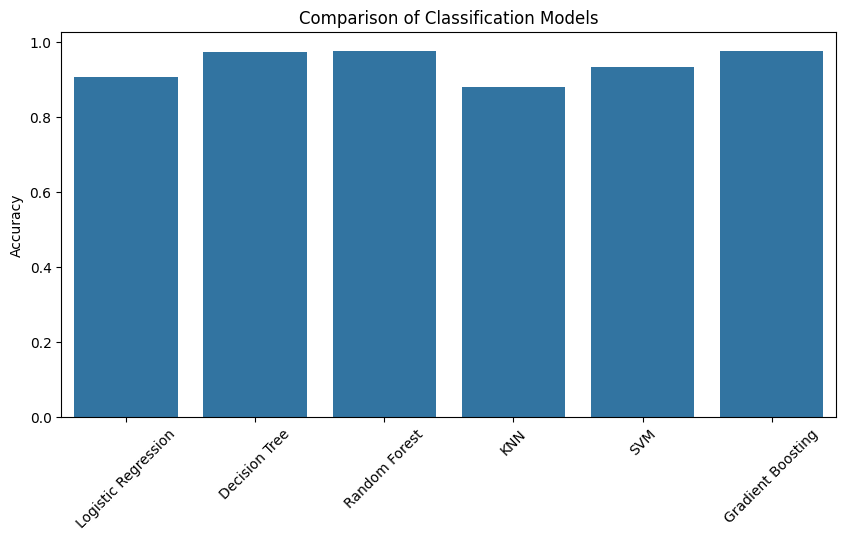

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv("Loan.csv")
data=data.rename(
    columns={
        'loan_id':'loan_application_id',
        ' no_of_dependents':'financially_dependent_count',
        ' education':'highest_education',
        ' self_employed':'employment_status',
        ' income_annum':'annual_income',
        ' loan_amount':'loan_principal',
        ' loan_term':'loan_duration_months',
        ' cibil_score':'credit_score',
        ' residential_assets_value':'primary_residence_value',
        ' commercial_assets_value':'commercial_property_value',
        ' luxury_assets_value':'high_value_assets',
        ' bank_asset_value':'liquid_assets',
        ' loan_status':'loan_approval_decision'
    }
)
data['annual_income']=data['annual_income'].fillna(data['annual_income'].median())
data['highest_education']=data['highest_education'].fillna(data['highest_education'].mode()[0])
data['loan_principal']=data['loan_principal'].fillna(data['loan_principal'].median())
data['primary_residence_value']=data['primary_residence_value'].fillna(data['primary_residence_value'].mean())
data['commercial_property_value']=data['commercial_property_value'].fillna(data['commercial_property_value'].mean())
data['high_value_assets']=data['high_value_assets'].fillna(data['high_value_assets'].median())
data['liquid_assets']=data['liquid_assets'].fillna(data['liquid_assets'].median())
data.drop_duplicates(inplace=True,subset=data.columns[1:])
data['highest_education']=data['highest_education'].map({' Graduate':1,' Not Graduate':0})
data['loan_approval_decision']=data['loan_approval_decision'].map({' Approved':1,' Rejected':0})
data['employment_status']=data['employment_status'].map({' Yes':1,' No':0})
# Define Features and Target
X = data.drop(columns=['loan_approval_decision'])  # Features
y = data['loan_approval_decision']  # Target

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Classifier Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Models")
plt.xticks(rotation=45)
plt.show()
